# <div align='center'>第4章 回归分析</div>
### 内容<br>
 <div align='left'>                  
     <font color='steelblue' size=4>
       4.1 回归分析的概念与一元线性回归<br><br>     
       4.2 多元线性回归及统计量解析<br><br>            
       4.3 逐步回归与模型选择<br> <br>           
       4.4 回归诊断<br> <br>   
       4.5 广义线性回归<br>  <br>          
       4.6 非线性回归<br> <br>    
      </font>
</div>
       


------------------------------------

## 4.1 回归分析的概念与一元线性回归
<br>

### 4.1.1 回归分析的概念

通过大量实验或观测数据，用统计方法寻找变量之间的关系和统计规律，回归分析( regression analysis)就是研究这类规律的方法。

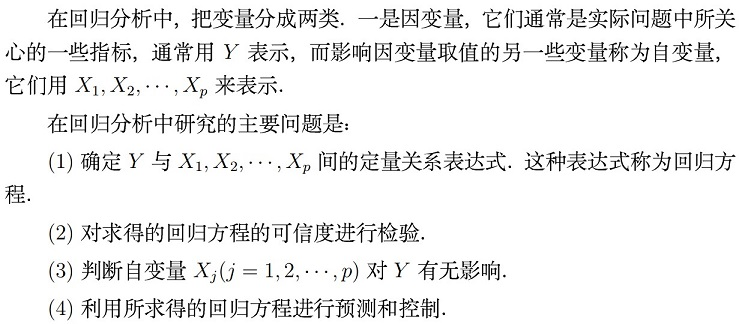

### 4.1.2 一元线性回归
这里的‘一元’指只有一个自变量X，‘线性’表示因变量Y与X之间是一种直线关系，用以下公式表示：

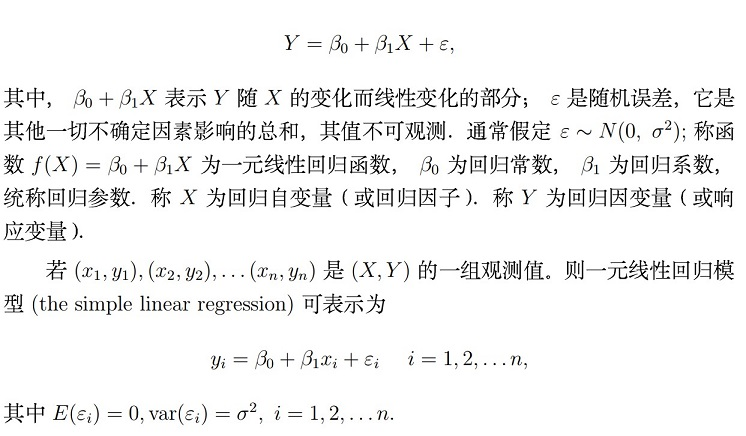

#### (1)回归参数的估计
<br>

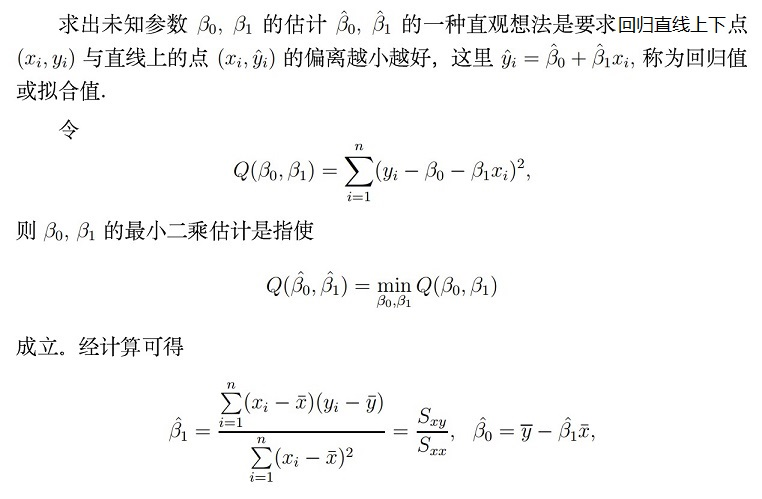
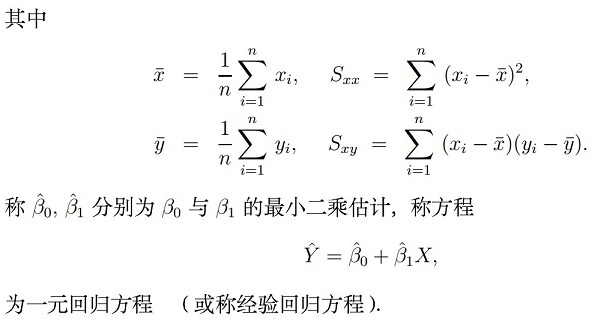

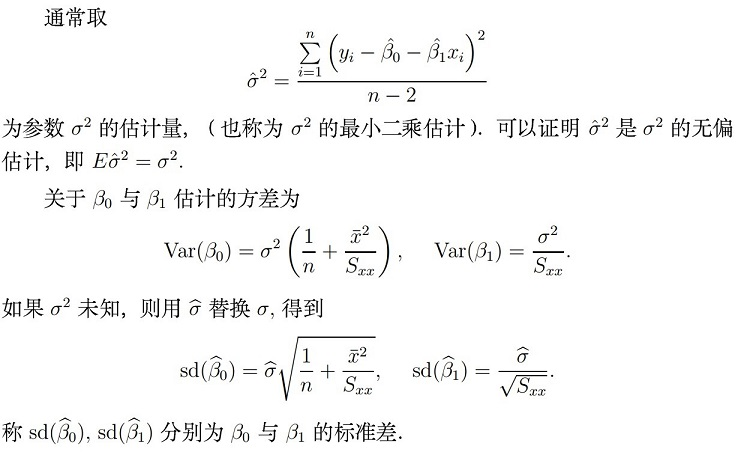



- #### 最小二乘法的推导过程：
 - ##### 最小二乘准则，分别对$\hat\beta_0$, $\hat\beta_1$求导：
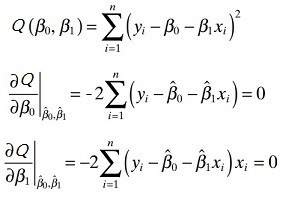

 - ##### 对上述方程的简化的最小二乘正规方程：
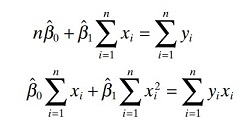

 - ##### 正规方程的简化：
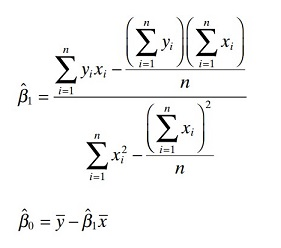

 - ##### 进一步简化即得：
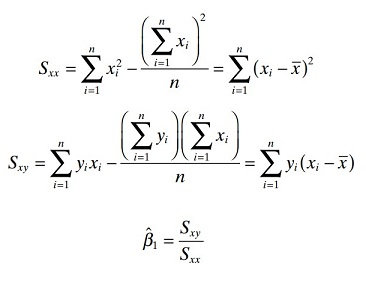

- #### 示例：
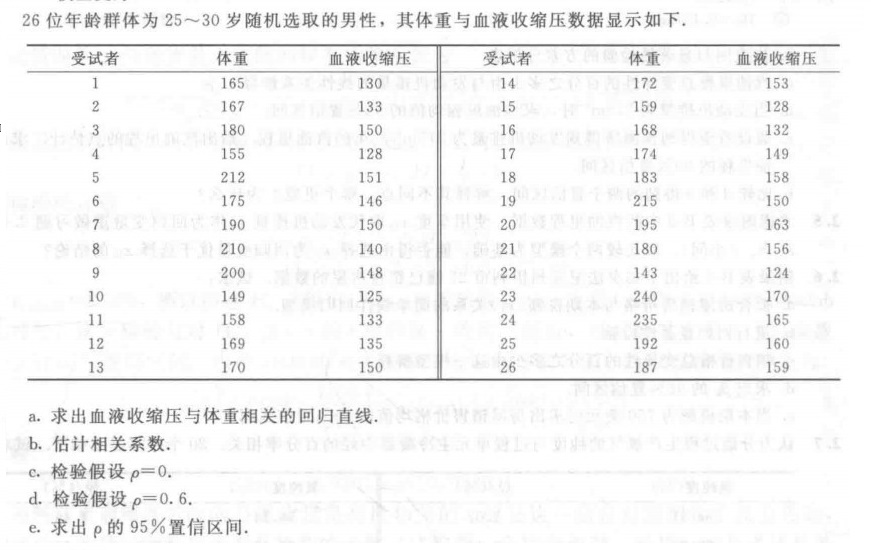

In [2]:
'''
使用Statsmodels进行线性回归，分析体重与血压之间的关系
自变量为体重，因变量为血压
使用OLS模型进行线性回归，OLS为“普通最小二乘(ordinary least squares)”的英文缩写
'''
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
###自变量与因变量数据
weight=np.array([165,167,180,155,212,175,190,210,200,149,158,169,170,
            172,159,168,174,183,215,195,180,143,240,235,192,187])
bp=np.array([130,133,150,128,151,146,150,140,148,125,133,135,150,
             153,128,132,149,158,150,163,156,124,170,165,160,159])

###add_constant函数为估计截距项增加一个值为1的常量，公式为：Y~1+X
weight_model=sm.add_constant(weight)

###使用Statsmodels的OLS函数进行线性回归。
result=sm.OLS(bp,weight_model).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     35.74
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           3.59e-06
Time:                        10:06:19   Log-Likelihood:                -92.041
No. Observations:                  26   AIC:                             188.1
Df Residuals:                      24   BIC:                             190.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.1044     12.910      5.353      0.000      42.459      95.750
x1             0.4194      0.070      5.979      0.000       0.275       0.564
==============================================================================
Omnibus:                        3.391   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                1.449
Skew:                           0.123   Prob(JB):                        0.485
Kurtosis:                       1.870   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- #### 结果解析：

(1) 截距项$\beta_0$: 69.1044, 回归系数$\beta_1$: 0.4194, 因此回归方程为：$Y=69.1044+0.4194X$

(2) 回归分析拟合结果的第一部分为回归效果的检验；第二部分为回归系数及其检验和置信区间；第三部分为残差的正态性检验

(3) 本节将详解一些回归参数的计算，比如回归系数，回归系数的置信区间、F检验、t检验以及R方和调整后R方，以及残差的正态性检验等

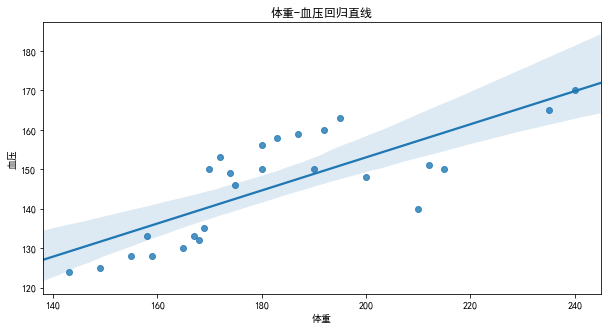

In [3]:
# 下面两行代码是设置图形的中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(10,5))
sns.regplot(weight,bp)
plt.xlabel('体重')
plt.ylabel('血压')
plt.title('体重-血压回归直线')
plt.show()

In [4]:
### 当weight=200预测血压是多少
#注意预测是输入[1,200]，第一个数据是与截距项或常量项相乘，值为1，与beta0相乘
#第二个数据是体重，与beta1相乘
print('模型预测结果：',result.predict(exog=np.array([1,200]),transform=False)[0])

### 通过𝑌=69.1044+0.4194𝑋计算，从params取出系数的精确值
print('\n通过回归方程计算：',result.params[0]*1+result.params[1]*200)

模型预测结果： 152.9874133743258

通过回归方程计算： 152.9874133743258


In [5]:
###一元线性回归的参数估计，OLS算法
beta1=np.sum((weight-np.mean(weight))*(bp-np.mean(bp)))/np.sum((weight-np.mean(weight))**2)
beta0=np.mean(np.mean(bp))-beta1*np.mean(weight)
print('应用普通最小二乘法估计的回归参数：beta0=%0.4f, beta1=%0.4f'%(beta0,beta1))

应用普通最小二乘法估计的回归参数：beta0=69.1044, beta1=0.4194


#### (2) 回归方程的显著性检验<br>

##### 假设检验：
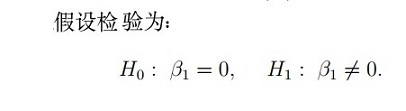

##### 检验方法：
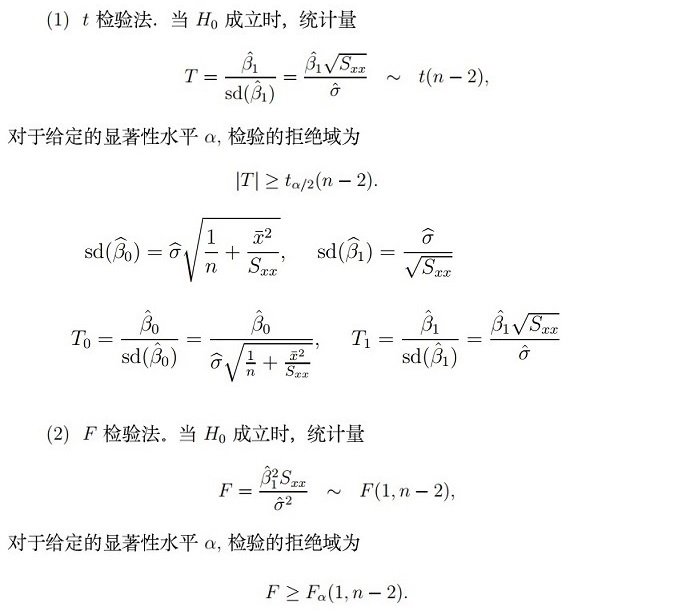

In [135]:
'''
常量和回归系数的的标准误计算过程：上图中的sd(beta0),sd(beta1)计算公式。
参见《回归分析导论》p16
'''
####残差，从回归结果对象中获取
res=result.resid 
###残差方差与标准差,注意方差的计算方式
res_var=np.sum((res-np.mean(res))**2)/(len(res)-2)
res_std=res_var**0.5 
### 求自变量weight的校正平方和
sxx=np.sum((weight-np.mean(weight))**2)
###截距项beta0的标准误
stderr0=res_std*np.sqrt(1/len(weight)+np.mean(weight)**2/sxx)
print('常数项（截距项）beta0的标准误（std err）：%0.3f'%stderr0)
### 回归系数beta1的标准误
stderr1=res_std/np.sqrt(sxx)
print('\n回归系数beta1的标准误（std err）：%0.3f'%stderr1)

常数项（截距项）beta0的标准误（std err）：12.910

回归系数beta1的标准误（std err）：0.070


In [136]:
'''
回归参数检验：回归常量beta0和回归系数beta1的t值以及t检验
t=beta_hat/stderr(beta)，即回归参数/回归参数标准误
'''
###回归参数beta0,beta1的标准误
t0=beta0/stderr0
t1=beta1/stderr1
print('回归参数beta0、beta1的t值分别为：%0.3f,%0.3f'%(t0,t1))
'''
t检验的拒绝域|T|>t'(n-2),分解为P(T<-t')+P(T>t')，即双侧检验的两个概率之和
使用两种方法计算：2*st.t.cdf(-t',n-2)或2*st.t.sf(t',n-2)
其中，假定t'>0,n为数据样本量
'''
n=len(weight)
##分别计算beta0和beta1的t检验p值
p0=2*st.t.sf(t0,n-2)
p1=2*st.t.sf(t1,n-2)
print('\n回归参数beta0、beta1的t检验P值分别为：{},{}'.format(p0,p1))

回归参数beta0、beta1的t值分别为：5.353,5.979

回归参数beta0、beta1的t检验P值分别为：1.705895964415003e-05,3.5911051124161855e-06


In [137]:
'''
F检验。F值=beta^2*sxx/res_var，即回归系数平方和乘以自变量校正平方和，然后除以残差方差
p值通过st.f.sf(F值,1,n-2)或st.f.cdf(-F值,1,n-2),函数参数：1为分子自由度，n-2为分母自由度
'''
###F值只计算回归系数，无回归常数beta0
F1=beta1**2*sxx/res_var
print('回归系数的F值为：%0.2f'%F1)

###F检验的P值计算，使用生存函数sf计算
p_F1=st.f.sf(F1,1,n-2)
print('\n回归系数的F检验P值为：%0.8f'%p_F1)

回归系数的F值为：35.74

回归系数的F检验P值为：0.00000359


In [138]:
'''
R方以及调整后R方
'''
###残差平方和，总平方和与回归平方和
sse=np.sum(res**2) #残差平方和
#总平方和：sum(y-mean(y)^2)，即因变量减去其均值之后平方和
sst=np.sum((bp-np.mean(bp))**2) 
#回归平方和：sum((y_hat-mean(y))^2)，即因变量回归值减去因变量的平均值的平方和
y_hat=result.predict()#调用predict函数获得y_hat
ssr=np.sum((y_hat-np.mean(bp))**2)
###两种方法计算R方
R2=1-sse/sst #或者
R2=ssr/sst #结果一致，精度稍微有差别
###调整后R方,sse/(n-2)=残差平方和/残差自由度,sst/(n-1)=总平方和/模型自由度
adjR2=1- (sse/(n-2))/(sst/(n-1))
print('R方和调整后R方的值分别为：%0.3f, %0.3f'%(R2,adjR2))

R方和调整后R方的值分别为：0.598, 0.582


In [139]:
'''
对数似然、AIC、BIC
'''
###对数似然值，注意这里使用残差方差的有偏估计，调用np.var计算
ll = -(n/2)*np.log(2*np.pi)-(n/2)*np.log(np.var(res))-n/2
print('对数似然：', np.round(ll,3))

###赤池信息准则:-2乘以对数似然比+2*（自变量个数+1）。
#−2ln(L)+2(p+1)（赤池弘次），其中p为自变量个数，ln(L)即ll
AIC  = -2*ll + 2*(2)
print('AIC：',round(AIC,1))

###贝叶斯信息准则：−2ln(L)+ln(n)∗(自变量个数+1),其中ln(L)即llr
BIC = -2*ll+np.log(n)*(2) 
print('BIC：',round(BIC,1))

对数似然： -92.041
AIC： 188.1
BIC： 190.6


#### (3) 参数$\beta_0$, $\beta_1$的区间估计
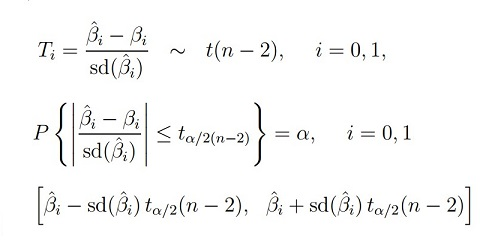

In [140]:
'''
回归参数的双侧置信区间，
(1)首先用回归参数标准误乘以t分布的分位数（概率为0.975，自由度为n-2）
(2)然后用回归参数减和加该数，即可得出下限和上线
'''
###被加和减的数
beta0_tmp=stderr0*st.t.ppf(0.975,n-2)
###beta0的置信下线和上线
lower_beta0=beta0-beta0_tmp
upper_beta0=beta0+beta0_tmp
print('回归参数beta0的置信区间为[%0.3f, %0.3f]'%(lower_beta0,upper_beta0))

###beta1的置信下线和上线
beta1_tmp=stderr1*st.t.ppf(0.975,n-2)
lower_beta1=beta1-beta1_tmp
upper_beta1=beta1+beta1_tmp
print('\n回归参数beta1的置信区间为[%0.3f, %0.3f]'%(lower_beta1,upper_beta1))

回归参数beta0的置信区间为[42.459, 95.750]

回归参数beta1的置信区间为[0.275, 0.564]


-------------------

## 4.2 多元线性回归

### 4.2.1 多元线性回归模型构建以及参数与统计量详解

- #### 多元线性回归模型:
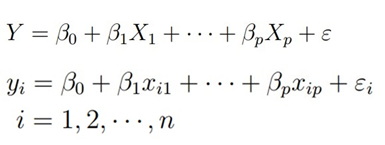

- #### 矩阵的形式：
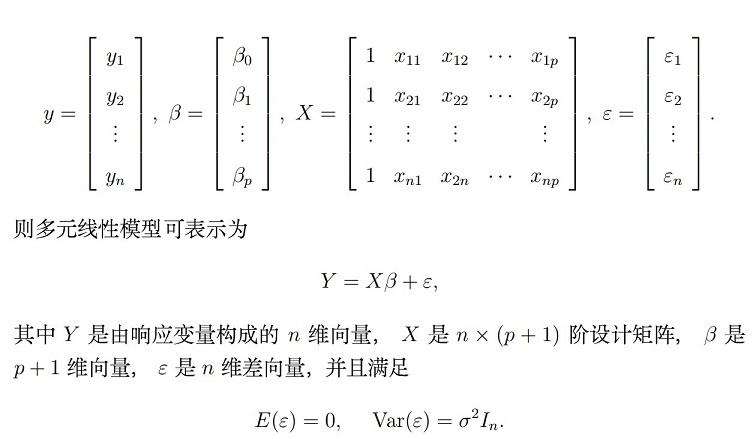

- #### 设计矩阵：
参考网址

https://www.jianshu.com/p/d2419da9cd97

https://en.wikipedia.org/wiki/Design_matrix

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy
np.random.seed(42)
x1 = np.random.normal(0,0.4,100)
x2 = np.random.normal(0,0.6,100)
x3 = np.random.normal(0,0.2,100)
eps = np.random.normal(0,0.05,100)
X = np.c_[x1,x2,x3]
beta = [0.1,0.2,0.7]
y = np.dot(X,beta) + eps
X_model = sm.add_constant(X) #参见《回归分析导论》p53
model = sm.OLS(y,X_model)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     617.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.38e-62
Time:                        10:06:09   Log-Likelihood:                 172.11
No. Observations:                 100   AIC:                            -336.2
Df Residuals:                      96   BIC:                            -325.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.004      0.981      0.329      -0.004       0.013
x1             0.0778      0.013      6.197      0.000       0.053       0.103
x2             0.1968      0.008     25.128      0.000       0.181       0.212
x3             0.7067      0.021     33.885      0.000       0.665       0.748
==============================================================================
Omnibus:                        1.353   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.317
Skew:                           0.169   Prob(JB):                        0.518
Kurtosis:                       2.551   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (1) 最小二乘法实现参数估计——估计自变量X的系数

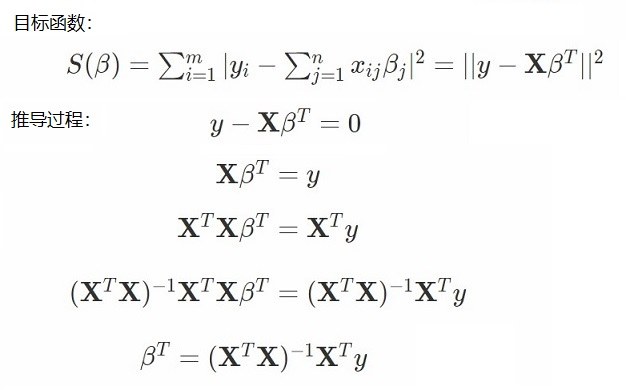

In [22]:
###单位矩阵的形成
np.linalg.inv(X.T@X)@X.T@X

array([[ 1.00000000e+00,  1.91171600e-17,  2.34743290e-17],
       [-5.46942458e-18,  1.00000000e+00, -3.39809810e-17],
       [-2.63406224e-17, -1.63712180e-16,  1.00000000e+00]])

In [23]:
'''
回归系数的计算：X转置乘以X，对点积求逆后，再点乘X转置，最后点乘y   
'''
#beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_model.T,X_model)),X_model.T),y)#回归系数
beta_hat =np.linalg.inv(X_model.T@X_model)@X_model.T@y#回归系数
print('回归系数:',np.round(beta_hat,4))#四舍五入取小数点后4位
print('\n回归方程：Y_hat=%0.4f+%0.4f*X1+%0.4f*X2+%0.4f*X3' %
      (beta_hat[0],beta_hat[1],beta_hat[2],beta_hat[3]))

回归系数: [0.0044 0.0778 0.1968 0.7067]

回归方程：Y_hat=0.0044+0.0778*X1+0.1968*X2+0.7067*X3


#### (2) R方与调整后R方与下文中的各种统计量一起用来检验回归方程的显著性

In [24]:
#y_hat = np.dot(X_model,beta_hat)#回归值（拟合值）的计算
y_hat = X_model@beta_hat#回归值（拟合值）的计算
y_mean = np.mean(y)
sst = np.sum((y-y_mean)**2)#总平方和：即y减去y均值后差的平方和
ssr = np.sum((y_hat-y_mean)**2)#回归平方和:y回归值减去y均值后差的平方和
#sse = sum((y-y_hat)**2)#残差平方和:y值减去y回归值之差的平方和
sse = np.sum(results.resid**2)
R_squared =1 - sse/sst#R方：1减去残差平方和除以总平方和的差
print('R方:',np.round(R_squared,3))
#调整后平方和：100表示样本数据总数(n)，3表示自变量个数(p)
adjR_squared =1- (sse/(100-3-1))/(sst/(100-1))
print('\n调整后R方:',np.round(adjR_squared,3))

R方: 0.951

调整后R方: 0.949


In [25]:
ssr/sst

0.9507045483062276

#### (3) F统计量以及F统计量的p值，对数似然，赤池信息准则(AIC)，贝叶斯信息准则(BIC)

- #### F显著性检验：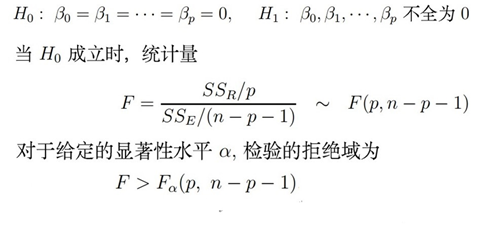

In [26]:
F = (ssr/3)/(sse/(100-3-1));
print('F统计量：',round(F,1))
F_p = st.f.sf(F,3,96)#使用F分布的残存函数计算P值
print('F统计量的P值：', F_p)

#对数似然值计算公式： L=-(n/2)*ln(2*pi)-(n/2)*ln(sse/n)-n/2
res = results.resid#残差
#res = y-y_hat
sigma_res = np.std(res) #残差标准差
var_res = np.var(res) #残差方差
ll = -(100/2)*np.log(2*np.pi)-(100/2)*np.log(var_res)-100/2
print('对数似然：', round(ll,2))

#赤池信息准则:-2乘以对数似然比+2*（自变量个数+1）。
#−2ln(L)+2(p+1)（赤池弘次），其中p为参数个数，ln(L)即ll
AIC  = -2*ll + 2*(3+1)
print('\nAIC：',round(AIC,1))

# 贝叶斯信息准则：−2ln(L)+ln(n)∗(自变量个数+1),其中ln(L)即llr
BIC = -2*ll+np.log(100)*(3+1) 
print('\nBIC：',round(BIC,1))

F统计量： 617.1
F统计量的P值： 1.3817403300252077e-62
对数似然： 172.11

AIC： -336.2

BIC： -325.8


#### (4) 回归系数的标准误(std err),t值，p值以及置信区间

- #### 回归系数标准误：
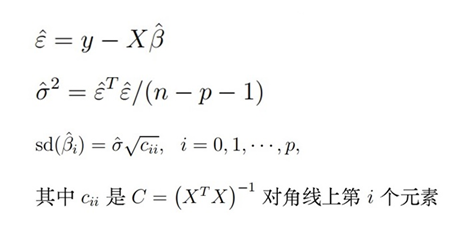

In [54]:

C = np.linalg.inv(np.dot(X_model.T,X_model))#X倒置点乘X，然后对点积求逆
C_diag = np.diag(C)#取出C矩阵对角线的值
sigma_unb= (sse/(100-3-1))**(1/2)#残差标准差的无偏估计：残差平方和/（样本数减参数个数减1）
'''
回归系数标准误std err的计算：
计算方式：残差标准差（无偏估计）乘以（C矩阵对角线上对应值的平方根）
'''
stdderr_const = sigma_unb*(C_diag[0]**(1/2))#常数项（截距）的标准误，对应C_diag[0]
print('常数项（截距）的标准误：',round(stdderr_const,3))
stderr_x1 = sigma_unb*(C_diag[1]**(1/2))#第一个系数对应C_diag[1]
print('\nbeta1的标准误：',round(stderr_x1,3))
stderr_x2 = sigma_unb*(C_diag[2]**(1/2))#第二个系数对应C_diag[2]
print('\nbeta2的标准误：',round(stderr_x2,3))
stderr_x3 = sigma_unb*(C_diag[3]**(1/2))#第三个系数对应C_diag[3]
print('\nbeta3的标准误：',round(stderr_x3,3))

常数项（截距）的标准误： 0.004

beta1的标准误： 0.013

beta2的标准误： 0.008

beta3的标准误： 0.021


In [28]:
print('C矩阵：\n', C)
print('\nC矩阵的对角线元素：',C_diag)

C矩阵：
 [[ 1.02027769e-02  3.59625516e-03 -1.56275451e-04 -3.95262483e-03]
 [ 3.59625516e-03  8.08446755e-02  6.65199279e-03 -2.52019119e-02]
 [-1.56275451e-04  6.65199279e-03  3.14396283e-02  9.12318440e-04]
 [-3.95262483e-03 -2.52019119e-02  9.12318440e-04  2.22937615e-01]]

C矩阵的对角线元素： [0.01020278 0.08084468 0.03143963 0.22293762]


- #### 回归系数显著性检验：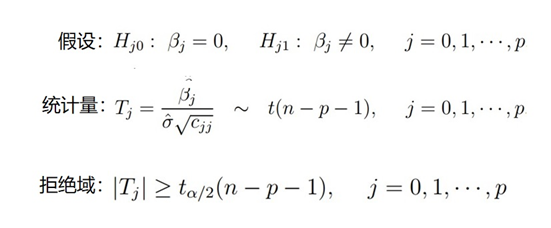

In [29]:
'''
回归方程的显著性检验
(1) t检验：beta_hat[i](相应的回归系数)除以相应系数标准误
(2) 使用scipy.stats.t.sf残存函数（Survival function），
    等于：1-累积分布函数（1-cdf）；
    由于是对t的绝对值进行检验，因此需要乘以2。即p<-t与p>t之和  
'''
t_const = beta_hat[0]/stdderr_const
print('截距项的t值：',round(t_const,3))
p_const = 2*st.t.sf(t_const,96)
print("P>|t|:",round(p_const,3))
t_x1 = beta_hat[1]/stderr_x1
print('\nx1系数的t值：',round(t_x1,3))
p_t1 = 2*st.t.sf(t_x1,96)
print("P>|t|:",round(p_t1,3))
t_x2 = beta_hat[2]/stderr_x2
print('\nx2系数的t值：',round(t_x2,3))
p_t2 = 2*st.t.sf(t_x2,96)
print("P>|t|:",round(p_t2,3))
t_x3 = beta_hat[3]/stderr_x3
print('\nx3系数的t值：',round(t_x3,3))
p_t3 = 2*st.t.sf(t_x3,96)
print("P>|t|:",round(p_t3,3))

截距项的t值： 0.981
P>|t|: 0.329

x1系数的t值： 6.197
P>|t|: 0.0

x2系数的t值： 25.128
P>|t|: 0.0

x3系数的t值： 33.885
P>|t|: 0.0


- #### 回归系数置信区间：<br>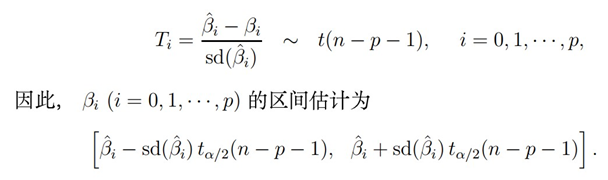

In [30]:
'''
回归系数置信区间计算公式：
betahat_i - t.ppf(1-alpha/2,n-p-1)*sigma_unb*C_diag[0]**(1/2)
                < =beta_i <=
betahat_i + t.ppf(1-alpha/2,n-p-1)*sigma_unb*C_diag[0]**(1/2)
t(1-alpha/2,n-p-1)是t值在0.025，自由度为n-p-1的分位数，
这里使用0.975来计算分位数的。调用scipy.stats.t.ppf进行计算，
该函数是cdf函数的逆函数，计算的是百分位数。
sigma_unb*C_diag[0]**(1/2)就是前面计算系数标准误的公式，
这里可以直接用系数标准误代替。
特别要注意：要使用残差标准差的无偏估计，即sigma_unb。
ppf是percent point function的简称，用来计算百分位数。
根据置信区间的理论，t分布的概率密度函数关于y轴对称，其均值为0
其显著性水平为alpha，置信度即为1-alpha，通过ppf求概率为1-alpha/2处的百分位数。
'''
const_inter_left = beta_hat[0] - st.t.ppf(0.975,96)*sigma_unb*C_diag[0]**(1/2)
const_inter_right = beta_hat[0] + st.t.ppf(0.975,96)*sigma_unb*C_diag[0]**(1/2)
print('常数项的置信区间是: [%0.3f,%0.3f]'%(const_inter_left,const_inter_right))
beta1_inter_left = beta_hat[1] - st.t.ppf(0.975,96)*sigma_unb*C_diag[1]**(1/2)
beta1_inter_right = beta_hat[1] + st.t.ppf(0.975,96)*sigma_unb*C_diag[1]**(1/2)
print('\nx1系数的置信区间是: [%0.3f,%0.3f]'%(beta1_inter_left,beta1_inter_right))
beta2_inter_left = beta_hat[2] - st.t.ppf(0.975,96)*sigma_unb*C_diag[2]**(1/2)
beta2_inter_right = beta_hat[2] + st.t.ppf(0.975,96)*sigma_unb*C_diag[2]**(1/2)
print('\nx2系数的置信区间是: [%0.3f,%0.3f]'%(beta2_inter_left,beta2_inter_right))
beta3_inter_left = beta_hat[3] - st.t.ppf(0.975,96)*sigma_unb*C_diag[3]**(1/2)
beta3_inter_right = beta_hat[3] + st.t.ppf(0.975,96)*sigma_unb*C_diag[3]**(1/2)
print('\nx3系数的置信区间是: [%0.3f,%0.3f]' % (beta3_inter_left,beta3_inter_right))

常数项的置信区间是: [-0.004,0.013]

x1系数的置信区间是: [0.053,0.103]

x2系数的置信区间是: [0.181,0.212]

x3系数的置信区间是: [0.665,0.748]


In [31]:
#比如对于系数，代入系数标准误进行计算，结果和上面一样。
beta3_inter_left = beta_hat[3] - st.t.ppf(0.975,96)*stderr_x3
beta3_inter_right = beta_hat[3] + st.t.ppf(0.975,96)*stderr_x3
print('x3系数的置信区间是: [%0.3f,%0.3f]' % (beta3_inter_left,beta3_inter_right))

x3系数的置信区间是: [0.665,0.748]


#### (5) Omnibus、 Prob(Omnibus), Jarque-Bera (JB),Prob(JB), Skew,  Kurtosis, Durbin-Watson,Cond. No.等值的计算。

In [32]:
'''
（1）注意峰度的定义方式有两种：一是Fisher定义，正态分布值为0；另一个是Pearson定义，正态分布值为3。
    StatsModels使用的是Pearson定义。按照Fisher定义，峰度=0表示正好符合正正态分布，
    大于0表示峰比较尖，反之表示比较平。
（2）对于偏度，偏度值大于0则为正偏态或左偏态；小于零则表示负偏态或右偏态。
'''
#Fisher定义峰度
#kurtosis = ((np.sum((res-res.mean())**4))/100)/((np.sum ((res-res.mean())**2)/100)**(1/2)-3 

#Pearson定义峰度
res_kurt = ((np.sum((res-res.mean())**4))/100)/((np.sum ((res-res.mean())**2)/100)**2)
res_skew = np.sum((res-res.mean())**3)/((sigma_res**3)*100)
#res_skew = 
'''
#或者使用scipy的函数计算峰度和偏度
from scipy.stats import kurtosis,skew
res_kurt = kurtosis(res,fisher=False)
res_skew = skew(res)

#也可以用pandas计算偏度和峰度,三种计算方式都有一定误差
import pandas  as pd
resFrame = pd.Series(res)
res_kurt = resFrame.kurt()
res_skew = resFrame.skew()
'''
print('残差峰度(Pearson定义)：',round(res_kurt,3))
print('\n残差偏度：',round(res_skew,3))

残差峰度(Pearson定义)： 2.551

残差偏度： 0.169


In [33]:
'''
#Jarque-Bera检验，使用scipy
from  scipy.stats import jarque_bera
jb_test = jarque_bera(res)
'''
'''#使用statsmodels.stats.api进行Jarque-Bera检验
jb_test = sms.jarque_bera(res)#返回值是个命名元组，包含J_B值及其P值
'''
#手动计算J_B值及其P值

jb_value = 100 / 6 * (res_skew**2 + (res_kurt - 3)**2 / 4)
jb_p = st.chi2.sf(jb_value, 2)
print('Jarque-Bera (JB): ',round(jb_value,3))
print('\nProb(JB): ',round(jb_p,3))

Jarque-Bera (JB):  1.317

Prob(JB):  0.518


In [34]:
#omnibus检验，使用statsmodels
omnibus_test = sms.omni_normtest(res) #omnibus检验
print('Omnibus：',round(omnibus_test.statistic,3))
print('Prob(Omnibus): ',round(omnibus_test.pvalue,3))

'''
Omnibus检验的具体步骤：
（1）计算残差的偏度检验值和峰度检验值。
（2）求出二者平方和。
（3）以平方和和自由度2为参数调用卡方分布的残存函数。
（4）平方和是Omnibus统计量的值，残存函数返回值是Omnibus统计量的P值。
从此示例可以看出scipy科学与统计计算功能之强大！
'''
from  scipy.stats import normaltest,skewtest,kurtosistest,skew,kurtosis,chi2
#normaltest(res)#此函数直接进行Omnibus检验
s, _ = skewtest(res)#注意：偏度检验和偏度并不是一回事
k, _ = kurtosistest(res)#峰度检验和峰度也不是一回事
k2 = s*s + k*k

print('\nOmnibus: ', np.round(k2,3))#
print('Prob(Omnibus):', np.round(chi2.sf(k2,2),3))#通过卡方分布的残存函数计算Omnibus的P值。

Omnibus： 1.353
Prob(Omnibus):  0.508

Omnibus:  1.353
Prob(Omnibus): 0.508


In [35]:
'''
Durbin-Watson检验：越接近2，表示残差越接近正态分布
#直接调用sms.durbin_watson()函数
dw = sms.durbin_watson(res)
'''
#原始计算公式：残差的差值平方和除以残差平方和
diff_resids = np.diff(res)
dw = np.sum(diff_resids**2) / np.sum(res**2)
print('Durbin-Watson: ',np.round(dw,3))

Durbin-Watson:  1.821


In [36]:
'''
条件数（Cond. No.）的计算步骤如下：
（1）获取增加常量1向量后的自变量矩阵，X_model
（2）计算X_model转置与其本身的点积C
（3）计算点积的特征值
（4）最大特征值/最小特征值，然后将结果开平方
条件数是衡量矩阵病态的一个指标，理论上该值越小越好。
'''
#C= np.dot(X_model.T,X_model)
eigs = np.linalg.eigh(C)[0]
cond = np.sqrt(eigs[-1]/eigs[0])
print('通过特征值计算Cond. No.: ',round(cond,3))

'''
条件数的另一种计算法：sqrt(||C||*||inv(C)||)，
即用矩阵C的范数乘以C逆的范数，然后再开平方。
'''
cond = np.sqrt(np.linalg.norm(C,ord=2)*np.linalg.norm(np.linalg.inv(C),ord=2))#注意设置ord=2
print('\n通过矩阵计算Cond. No.: ',round(cond,3))

通过特征值计算Cond. No.:  4.774

通过矩阵计算Cond. No.:  4.774


In [37]:
'''
多元回归分析的方差膨胀系数（VIF）的计算，这里直接调用StatsModels的函数。
某些教科书认为VIF>10即判定自变量存在多重共线性；StatsModels将
阈值设为5。
'''

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(X.shape[1]):
    print('\nx%d的VIF：%0.4f'%(i,variance_inflation_factor(X,i)))    

#计算第i个自变量的VIF，比如i=1
k_vars = X.shape[1]#提取列数，即自变量个数
x_1 = X[:, 1]
mask = np.arange(k_vars) != 1
x_not1 = X[:, mask]
#以第i个自变量作为因变量，其他自变量作为自变量调用OLS，然后提取Rsquared_i
r_squared_1 = sm.OLS(x_1, x_not1).fit().rsquared
vif_i1= 1. / (1. - r_squared_1)
print('\n手动计算自变量VIF（x1）：',vif_i1)


x0的VIF：1.0534

x1的VIF：1.0196

x2的VIF：1.0345

手动计算自变量VIF（x1）： 1.019570421001318


#### (6) 预测及其结果的置信区间
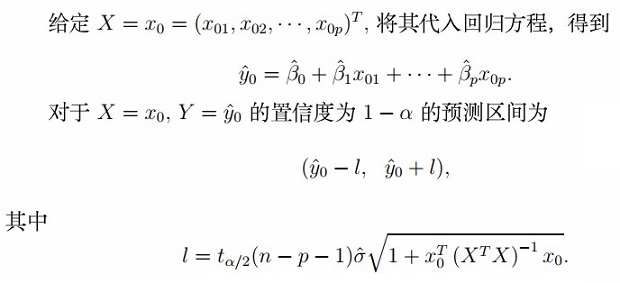

In [183]:
'''
设定被预测值[X1,X2,X3]的值为[4,2,3]，其设计矩阵为[1,4,2,3]。
计算其预测值，以及置信度为95%的置信区间。
'''
###被预测值
x_pre=[1,4,2,3]
###预测结果
pre_result=results.predict(x_pre)
###l统计量。
l=st.t.ppf(0.975,96)*sigma_unb*np.sqrt(1+x_pre@C@x_pre)
###置信区间的上下限。
pre_lower=pre_result-l#置信下限
pre_upper=pre_result+l#置信上限

print('预测结果为：%0.10f'%pre_result,'，置信下限：%0.10f'%pre_lower,\
      '，置信上限：%0.10f'%pre_upper)

###还可以通过preiction对象获得预测值以及置信区间
#获得预测对象，以被预测值作为参数
pre1=results.get_prediction(x_pre)
#预测结果
pre_result1=pre1.predicted_mean
#置信区间，是一个二维数组
conf1=pre1.conf_int(obs=True)
print('\n通过StatsModels进行预测：')
print('预测结果为：%0.10f'%pre_result1,'，置信下限：%0.10f'%conf1[0,0],\
      '，置信上限：%0.10f'%conf1[0,1])

预测结果为：2.8295160814 ，置信下限：2.6551880637 ，置信上限：3.0038440991

通过StatsModels进行预测：
预测结果为：2.8295160814 ，置信下限：2.6551880637 ，置信上限：3.0038440991


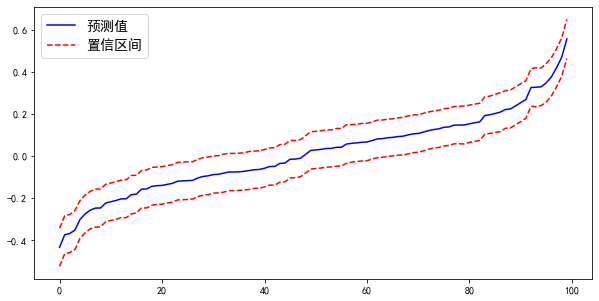

In [182]:
'''
使用测试数据绘制预测结果以及置信区间的曲线,
'''
###获取预测对象
pred2=results.get_prediction()
###获取预测结果
pred_result2=pred2.predicted_mean
###获取预测结果的置信区间
conf2=pred2.conf_int(obs=True)
###生成pandas的DataFrame对象并按照预测结果进行排序
pred_data=np.c_[pred_result2,conf2[:,0],conf2[:,1]]
df_pred=pd.DataFrame(pred_data).sort_values(by=0)

###绘制预测结果及其置信区间的曲线
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(10,5))
plt.plot(range(0,100),df_pred[0],color='blue',label='预测值') #回归曲线
plt.plot(range(0,100),df_pred[1],linestyle='--',color='r',label='置信区间') #置信上限
plt.plot(range(0,100),df_pred[2],linestyle='--',color='r') #置信下限
plt.legend(fontsize=14)
plt.show()

#### (7) 线性回归模型拟合结果的其他参数
包含模型拟合结果对象的属性及其具体计算方法

In [37]:
###模型的平均平方误差：被解释的平方和/模型自由度
#所谓被解释的平方和与回归模型解释的方差意思相同
results.mse_model,(np.sum((y-np.mean(y))**2)-np.sum(results.resid**2))/results.df_model

(1.204191490157404, 1.204191490157404)

In [38]:
###残差的平均平方误差：未被模型解释的方差/残差自由度
results.mse_resid,np.sum(results.resid**2)/(results.df_resid),results.ssr/results.df_resid

(0.001951222764832129, 0.0019512227648321287, 0.001951222764832129)

In [39]:
###总平均平方误差：总解释方差/（模型自由度+残差自由度）
results.mse_total,np.sum((y-np.mean(y))**2)/(results.df_model+results.df_resid)

(0.03838274601915249, 0.03838274601915249)

In [40]:
###残差平方和：未被解释的方差
results.ssr,np.sum(results.resid**2)

(0.18731738542388437, 0.18731738542388435)

In [41]:
###被解释的平方和或方差
results.ess, results.centered_tss-results.ssr

(3.612574470472212, 3.612574470472212)

In [42]:
###总平方和或总方差
results.centered_tss,np.sum((y-np.mean(y))**2)

(3.7998918558960963, 3.7998918558960963)

------------------

### 4.2.2 多元线性回归模型修正

- #### 示例：
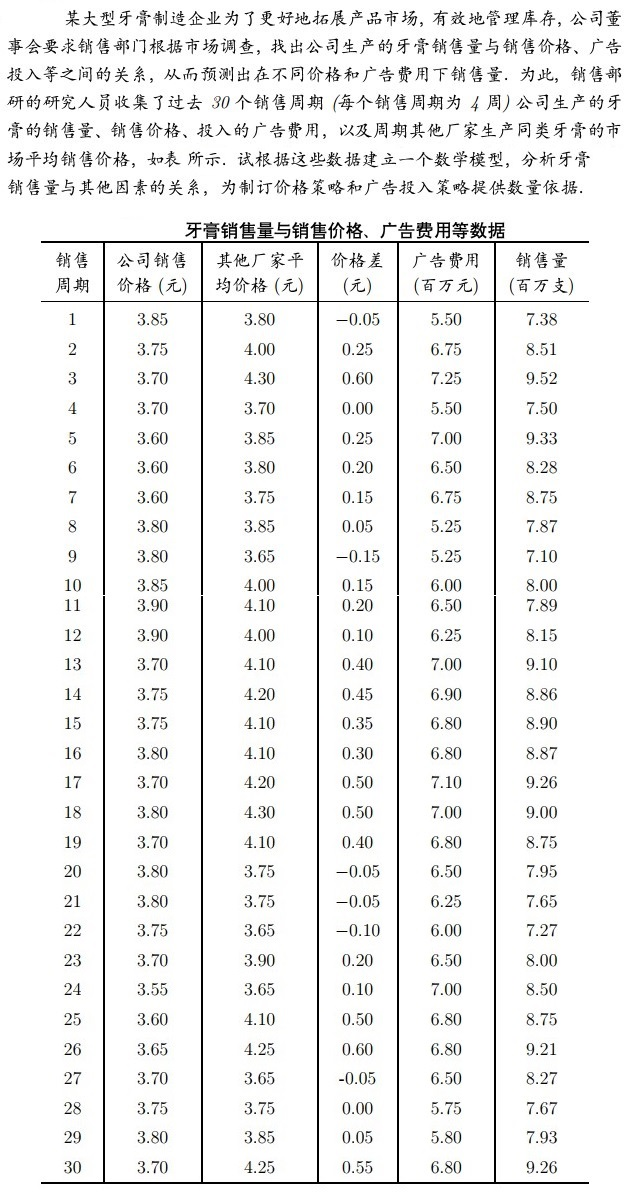

In [201]:
'''
回归模型修正，根据R方和调整后R方进行衡量
'''
X1=np.array([-0.05, 0.25,0.60,0,   0.25,0.20, 0.15,0.05,-0.15, 0.15,
         0.20, 0.10,0.40,0.45,0.35,0.30, 0.50,0.50, 0.40,-0.05,
        -0.05,-0.10,0.20,0.10,0.50,0.60,-0.05,0,0.05, 0.55])
X2=np.array([5.50,6.75,7.25,5.50,7.00,6.50,6.75,5.25,5.25,6.00,
         6.50,6.25,7.00,6.90,6.80,6.80,7.10,7.00,6.80,6.50,
         6.25,6.00,6.50,7.00,6.80,6.80,6.50,5.75,5.80,6.80])
Y =np.array([ 7.38,8.51,9.52,7.50,9.33,8.28,8.75,7.87,7.10,8.00,
         7.89,8.15,9.10,8.86,8.90,8.87,9.26,9.00,8.75,7.95,
         7.65,7.27,8.00,8.50,8.75,9.21,8.27,7.67,7.93,9.26])
###使用formula公式，更灵活。
formula1 = 'y~x1+x2'
result1=smf.ols(formula1,{'y':Y,'x1':X1,'x2':X2}).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     105.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.84e-13
Time:                        14:20:47   Log-Likelihood:                 2.0347
No. Observations:                  30   AIC:                             1.931
Df Residuals:                      27   BIC:                             6.134
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4075      0.722      6.102      0.000       2.925       5.890
x1             1.5883      0.299      5.304      0.000       0.974       2.203
x2             0.5635      0.119      4.733      0.000       0.319       0.808
==============================================================================
Omnibus:                        1.445   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                0.487
Skew:                           0.195   Prob(JB):                        0.784
Kurtosis:                       3.486   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

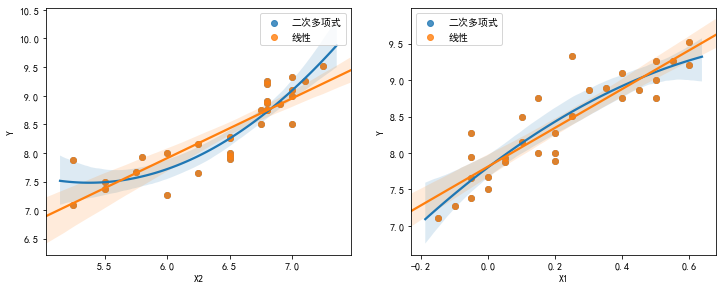

In [164]:
### 通过初步拟合，可看出X2更适合二次曲线拟合
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.regplot(X2,Y,order=2,label='二次多项式')
sns.regplot(X2,Y,label='线性')
plt.xlabel('X2')
plt.ylabel('Y')
plt.legend()
plt.subplot(222)
sns.regplot(X1,Y,order=2,label='二次多项式')
sns.regplot(X1,Y,label='线性')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()
plt.show()

In [203]:
### 使用X2二次曲线拟合，同时考虑X1和X2的交互作用
formula2= 'y~x1+x2+I(x2**2)+x1:x2'
result2=smf.ols(formula2,{'y':Y,'x1':X1,'x2':X2}).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     72.78
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           2.11e-13
Time:                        14:22:55   Log-Likelihood:                 7.5137
No. Observations:                  30   AIC:                            -5.027
Df Residuals:                      25   BIC:                             1.979
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1133      7.483      3.890      0.001      13.701      44.525
x1            11.1342      4.446      2.504      0.019       1.978      20.291
x2            -7.6080      2.469     -3.081      0.005     -12.693      -2.523
I(x2 ** 2)     0.6712      0.203      3.312      0.003       0.254       1.089
x1:x2         -1.4777      0.667     -2.215      0.036      -2.852      -0.104
==============================================================================
Omnibus:                        0.242   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.148
Skew:                          -0.153   Prob(JB):                        0.929
Kurtosis:                       2.843   Cond. No.                     9.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
###两个模型的残差方差对比
sigma2_1=np.sum(result1.resid**2)/(len(y)-3)
sigma2_2=np.sum(result2.resid**2)/(len(y)-3)
print('模型1的残差方差：',sigma2_1)
print('\n模型2的残差方差：',sigma2_2)

模型1的残差方差： 0.015811139155590206

模型2的残差方差： 0.010973159974176054


##### 结果解读：
(1) R方有很大提高，从0.886提高到0.921，效果明显。

(2) 对数似然上升明显，AIC和BIC下降也很明显，说明修正后的模型效果更好。

(3) 回归参数皆通过t检验和F检验。

(4) 通过两个模型的残差方差对比，模型2的残差方差更小，说明模型2拟合效果更好。

(5) 但是条件数急剧膨胀，说明共线性问题很严重。这个可以理解。

----------------